In [1]:
import pandas as pd
from sklearn import preprocessing

filename = '결측치 제거 후'
df = pd.read_csv(filename)

,SPOT,AGE,SEX,Number_of_people,Accommodation
0,강원도 삼척시,15~19세,여자,5.0,숙박여행
1,제주특별자치도 서귀포시,30대,여자,6.0,숙박여행
2,강원도 강릉시,30대,남자,3.0,숙박여행
3,강원도 강릉시,50대,남자,3.0,숙박여행
4,강원도 춘천시,40대,남자,2.0,당일여행
...,...,...,...,...,...
21993,제주특별자치도 제주시,30대,여자,13.0,숙박여행
21994,서울특별시 구로구,50대,남자,2.0,숙박여행
21995,제주특별자치도 제주시,50대,남자,2.0,당일여행
21996,제주특별자치도 제주시,50대,여자,2.0,당일여행


In [2]:
df = df.drop('SPOT', axis = 1)
df = df.drop('SEX', axis = 1)
df

,AGE,Number_of_people,Accommodation
0,15~19세,5.0,숙박여행
1,30대,6.0,숙박여행
2,30대,3.0,숙박여행
3,50대,3.0,숙박여행
4,40대,2.0,당일여행
...,...,...,...
21993,30대,13.0,숙박여행
21994,50대,2.0,숙박여행
21995,50대,2.0,당일여행
21996,50대,2.0,당일여행


In [3]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

encoder = LabelEncoder()
encoded_data = df.apply(encoder.fit_transform)
encoded_data


,AGE,Number_of_people,Accommodation
0,0,4,1
1,2,5,1
2,2,2,1
3,4,2,1
4,3,1,0
...,...,...,...
21993,2,12,1
21994,4,1,1
21995,4,1,0
21996,4,1,0


In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV

Y_data = encoded_data['Accommodation']
X_data = encoded_data.drop('Accommodation', axis = 1)

X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.3)

In [5]:
from sklearn import svm

clf = svm.SVC(kernel='rbf', gamma='scale')

clf.fit(X_train, Y_train)

SVC()

In [6]:
from sklearn.metrics import classification_report, accuracy_score

predictions = clf.predict(X_test)

accuracy = accuracy_score(Y_test, predictions)
print(f'Accuracy: {accuracy*100:.2f}%')
print(classification_report(Y_test, predictions))

Accuracy: 60.09%
              precision    recall  f1-score   support

           0       0.60      0.98      0.74      3929
           1       0.59      0.05      0.09      2671

    accuracy                           0.60      6600
   macro avg       0.59      0.51      0.42      6600
weighted avg       0.60      0.60      0.48      6600



In [7]:
from sklearn.metrics import confusion_matrix
predictions = clf.predict(X_test)
cm = confusion_matrix(Y_test, predictions)
print(cm)

[[3841   88]
 [2546  125]]


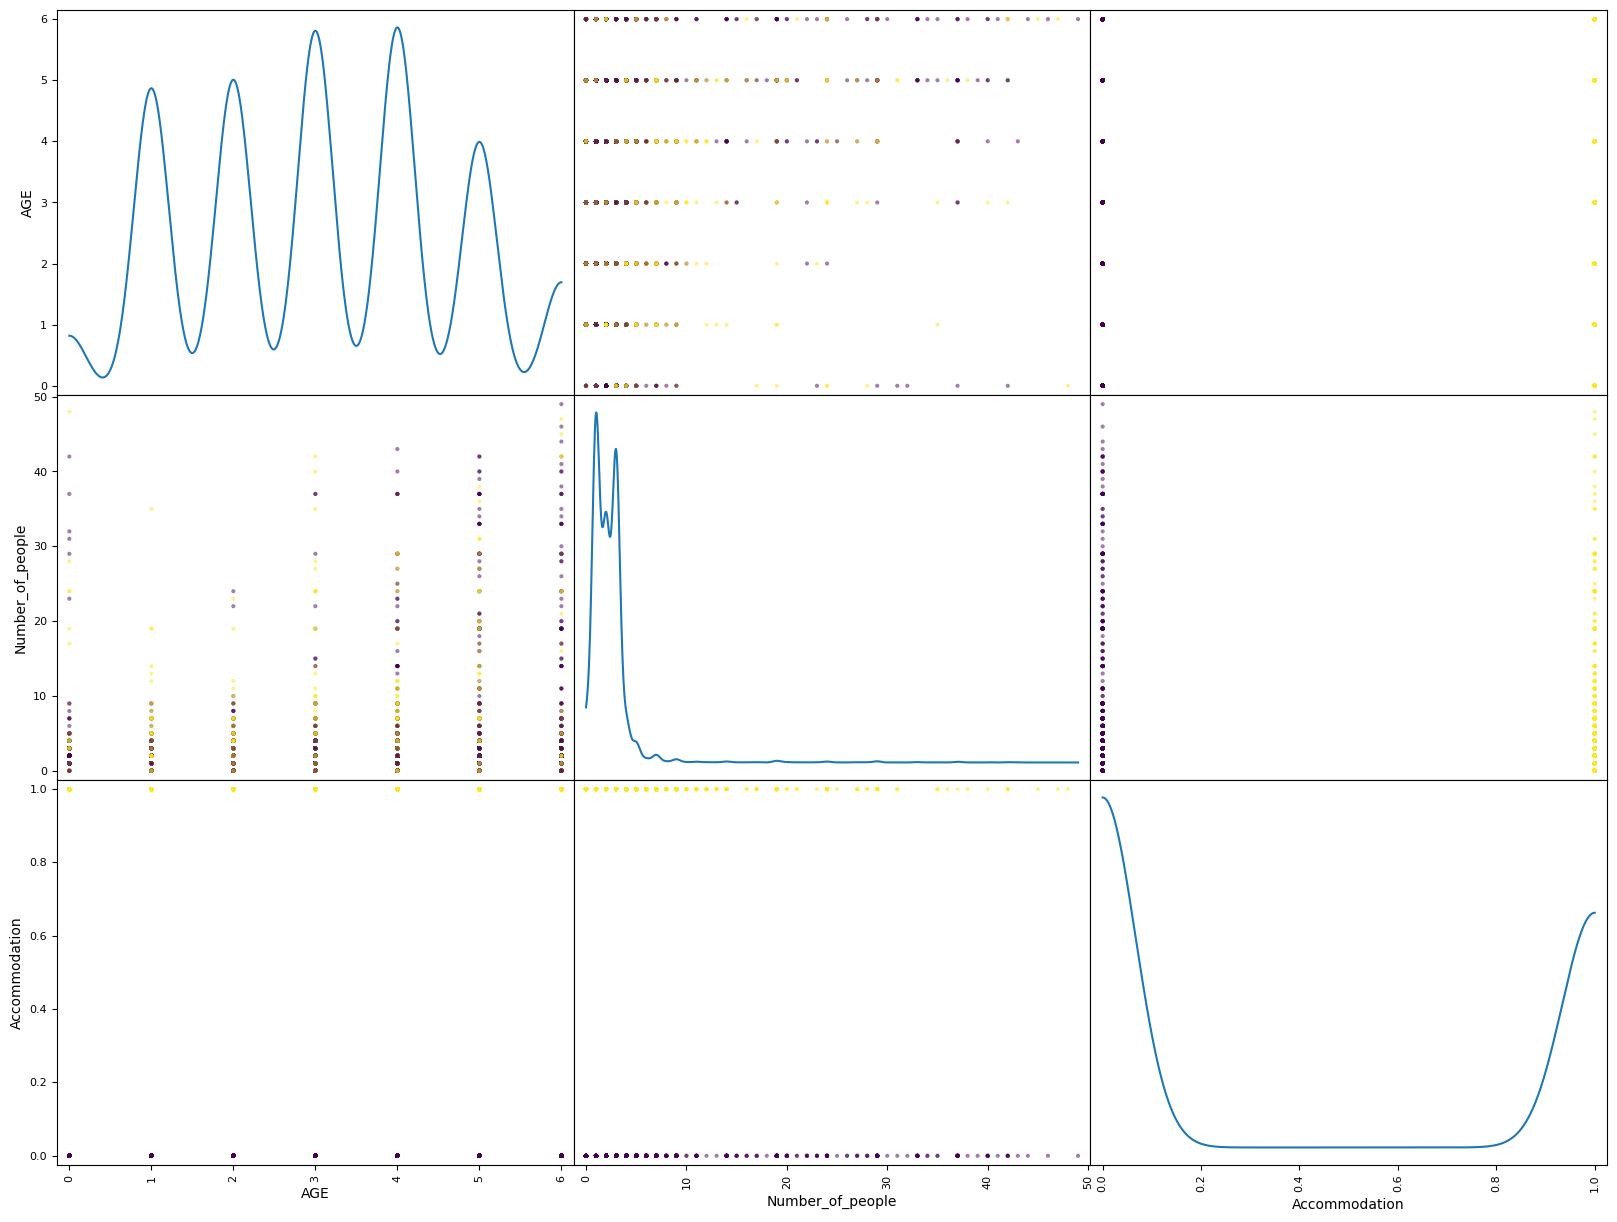

In [8]:
 #KDE 커널밀도추정곡선
spd= pd.plotting.scatter_matrix(encoded_data,c=encoded_data['Accommodation'], figsize=(20,15), diagonal="kde")

In [9]:
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

Y_data = encoded_data['Accommodation']
X_data = encoded_data.drop('Accommodation', axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.3, random_state=42)

svc = svm.SVC(kernel='rbf')
parameters = {
    'C': [0.1, 1, 10, 100], 
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1] 
}


grid_search = GridSearchCV(svc, parameters, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, Y_train)


best_parameters = grid_search.best_params_
print("Best Parameters:", best_parameters)


best_clf = grid_search.best_estimator_
predictions = best_clf.predict(X_test)


accuracy = accuracy_score(Y_test, predictions)
print(f'Accuracy: {accuracy*100:.2f}%')


print(classification_report(Y_test, predictions))


Best Parameters: {'C': 1, 'gamma': 'auto'}
Accuracy: 60.71%
              precision    recall  f1-score   support

           0       0.62      0.89      0.73      3983
           1       0.51      0.18      0.27      2617

    accuracy                           0.61      6600
   macro avg       0.57      0.53      0.50      6600
weighted avg       0.58      0.61      0.55      6600



In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm


best_clf = grid_search.best_estimator_


x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))



In [11]:
Z = best_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


C:\Users\JUNWON\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


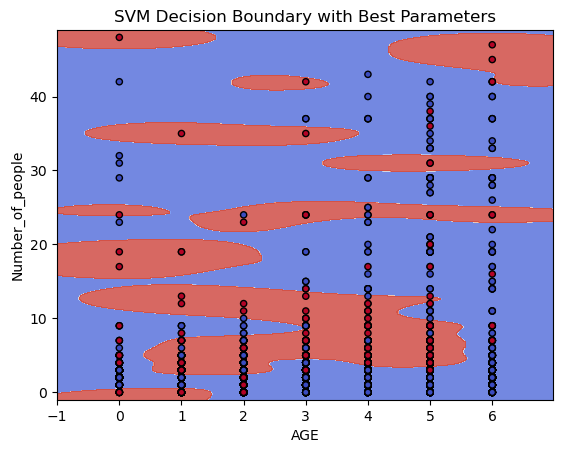

In [12]:

# 결과 플롯
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=Y_train, s=20, edgecolor='k', cmap=plt.cm.coolwarm)
plt.xlabel('AGE')
plt.ylabel('Number_of_people')
plt.title('SVM Decision Boundary with Best Parameters')
plt.show()